# Homework 3: Tables and Visualizations

Please complete this notebook by filling in the cells provided. When you’re done:

1. Select `Run All` from the `Cell` menu to ensure that you have executed all cells.
2. Rename your file to `LastnameFirstname_hw03` using the `File>Rename` from the `File` menu
3. Upload the file `LastnameFirstname_hw03.ipynb` to blackboard.

This assignment is due Tuesday, February 12, 2019.  Directly sharing answers is not okay, but discussing problems with course staff or with other students is encouraged.

Reading:
- Textbook chapter [6](https://www.inferentialthinking.com/chapters/06/Tables)

Run the cell below to prepare the notebook. **Passing the automatic tests does not guarantee full credit on any question.** The tests are provided to help catch some common errors, but it is *your* responsibility to answer the questions correctly.

In [65]:
# Run this cell to set up the notebook, but please don't change it.
import numpy as np
from datascience import *

# These lines do some fancy plotting magic.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

from client.api.assignment import load_assignment
tests = load_assignment('hw03.ok')

WARNING  | guidance.py:102 | Failed to read .ok_guidance file. It may not exist


Assignment: Homework 3: Tables and Charts
OK, version v1.13.11



## 1. Differences between Universities, Part II


**Question 1.1:** Suppose you're choosing a university to attend, and you'd like to *quantify* how *dissimilar* any two universities are.  You rate each university you're considering on several numerical traits.  You decide on a very detailed list of 1000 traits, and you measure all of them!  Some examples:

* The cost to attend (per year)
* The average Yelp review of nearby Thai restaurants
* The USA Today ranking of the Medical school
* The USA Today ranking of the Engineering school

You decide that the dissimilarity between two universities is the *total* of the differences in their traits.  That is, the dissimilarity is:

* the **sum** of
* the absolute values of
* the 1000 differences in their trait values.

In the next cell, we've loaded arrays containing the 1000 trait values for Stanford and Berkeley.  Compute the dissimilarity (according to the above method) between Stanford and Berkeley.  Call your answer `dissimilarity`.  Use a single line of code to compute the answer.

*Note:* The data we're using aren't real -- we made them up for this exercise, except for the cost-of-attendance numbers, which we estimated for a student from a median-income family living in California using [this tool](http://college-tuition.startclass.com).

In [66]:
stanford = Table.read_table("stanford.csv").column("Trait value")
berkeley = Table.read_table("berkeley.csv").column("Trait value")

dissimilarity = sum(abs(stanford-berkeley))
dissimilarity

14060.558701067917

In [67]:
_ = tests.grade('q1_1')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 1.2:** Identify all the subexpressions in your answer to the previous question, excluding the whole expression itself.  Write each on its own line.  Before each one, write a one-line comment describing the value of the subexpression, including what type of value it is.  We've written the first one for you.  (It should appear somewhere in your answer to the previous question!)

In [68]:
# An array of 1000 numbers, each a different measured trait of Stanford University.
# An array of 1000 numbers, each a different measured trait of UC Berkeley.
# The values of Stanford minus those of Berkeley.
# The absolute value of the values of Stanford minus those of Berkeley.

**Question 1.3:** Why do we sum up the absolute values of the differences in trait values, rather than just summing up the differences?

Stanford-Berkeley and Berkeley-Stanford would give you two different answers

##### Weighing the traits
After computing dissimilarities between several schools, you notice a problem with your method: the scale of the traits matters a lot.

Since schools cost tens of thousands of dollars to attend, the cost-to-attend trait is always a much bigger *number* than most other traits.  That makes it affect the dissimilarity a lot more than other traits.  Two schools that differ in cost-to-attend by \$900, but are otherwise identical, get a dissimilarity of 900.  But two schools that differ in graduation rate by .9 (a huge difference!), but are otherwise identical, get a dissimilarity of only .9.

One way to fix this problem is to assign different "weights" to different traits.  For example, we could fix the problem above by multiplying the difference in the cost-to-attend traits by .001, so that a difference of \\$900 in cost-to-attend results in a dissimilarity of $900 \times .001$, or $.9$.

Here's a revised method that does that for every trait:

1. For each trait, subtract the two schools' trait values.
2. Then take the absolute value of that difference.
3. *Now multiply that absolute value by a trait-specific number, like .001 or 2.*
4. Now sum the 1000 resulting numbers.

**Question 1.4:** Suppose you've already decided on a weight for each trait.  These are loaded into an array called `weights` in the cell below.  `weights.item(0)` is the weight for the first trait, `weights.item(1)` is the weight for the second trait, and so on.  Use the revised method to compute a revised dissimilarity between Berkeley and Stanford.

*Hint:* Using array arithmetic, your answer should be almost as short as in question 1.

In [69]:
weights = Table.read_table('weights.csv')

revised_dissimilarity = sum(abs(stanford-berkeley)*weights.column("Weight"))
revised_dissimilarity

505.98313211458805

In [70]:
_ = tests.grade('q1_4')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



## 2. Tables


**Question 2.1:** Suppose you have 4 apples, 3 oranges, and 3 pineapples.  (Perhaps you're using Python to solve a high school Algebra problem.)  Create a table that contains this information.  It should have two columns: "fruit name" and "count".  Give it the name `fruits`.

**Note:** Use lower-case and singular words for the name of each fruit, like `"apple"`.

In [71]:
# Our solution uses 1 statement split over 3 lines for readability.
# Of course, you can complete the question however you like.
fruits = Table().with_columns([
            'fruit name', ['apple', 'orange', 'pineapple'],
            'count', [4, 3, 3]])

fruits

fruit name,count
apple,4
orange,3
pineapple,3


In [72]:
_ = tests.grade('q2_1')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 2.2:** The file `inventory.csv` contains information about the inventory at a fruit stand.  Each row represents the contents of one box of fruit.  Load it as a table named `inventory`.

In [73]:
inventory = Table.read_table('inventory.csv')
inventory

box ID,fruit name,count
53686,kiwi,45
57181,strawberry,123
25274,apple,20
48800,orange,35
26187,strawberry,255
57930,grape,517
52357,strawberry,102
43566,peach,40


In [74]:
_ = tests.grade('q2_2')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 2.3:** Does each box at the fruit stand contain a different fruit?

Yes, each fruit has a corresponding box ID.

**Question 2.4** The file `sales.csv` contains the number of fruit sold from each box last Saturday.  It has an extra column called "price per fruit (\$)" that's the price *per item of fruit* for fruit in that box.  The rows are in the same order as the `inventory` table.  Load these data into a table called `sales`.

In [75]:
sales = Table.read_table("sales.csv")
sales

box ID,fruit name,count sold,price per fruit ($)
53686,kiwi,3,0.5
57181,strawberry,101,0.2
25274,apple,0,0.8
48800,orange,35,0.6
26187,strawberry,25,0.15
57930,grape,355,0.06
52357,strawberry,102,0.25
43566,peach,17,0.8


In [76]:
_ = tests.grade('q2_4')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 2.5:** How many fruits did the store sell in total on that day?

In [77]:
total_fruits_sold = sum(sales.column(2))
total_fruits_sold

638

In [78]:
_ = tests.grade('q2_5')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 2.6:** What was the store's total revenue (the total price of all fruits sold) on that day?

*Hint:* If you're stuck, think first about how you would compute the total revenue from just the grape sales.

In [79]:
total_revenue = sum(sales.column(2)*sales.column(3))
total_revenue

106.85

In [80]:
_ = tests.grade('q2_6')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 2.7:** Make a new table called `remaining_inventory`.  It should have the same rows and columns as `inventory`, except that the amount of fruit sold from each box should be subtracted from that box's count, so that the "count" is the amount of fruit remaining after Saturday.

In [81]:
new_inventory = inventory.column(2)-sales.column(2)
remaining_inventory = inventory.with_column('count', new_inventory)
remaining_inventory

box ID,fruit name,count
53686,kiwi,42
57181,strawberry,22
25274,apple,20
48800,orange,0
26187,strawberry,230
57930,grape,162
52357,strawberry,0
43566,peach,23


In [82]:
_ = tests.grade('q2_7')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



## 3. Unemployment


The Federal Reserve Bank of St. Louis publishes data about jobs in the US.  Below we've loaded data on unemployment in the United States.  There are many ways of defining unemployment, and our dataset includes two notions of the unemployment rate:

1. Among people who are able to work and are looking for a full-time job, the percentage who can't find a job.  This is called the Non-Employment Index, or NEI.
2. Among people who are able to work and are looking for a full-time job, the percentage who can't find any job *or* are only working at a part-time job.  The latter group is called "Part-Time for Economic Reasons", so the acronym for this index is NEI-PTER.  (Economists are great at marketing.)

The source of the data is [here](https://fred.stlouisfed.org/categories/33509).

**Question 3.1:** The data are in a CSV file called `unemployment.csv`.  Load that file into a table called `unemployment`.

In [83]:
unemployment = Table.read_table("unemployment.csv")
unemployment

Date,NEI,NEI-PTER
1994-01-01,10.0974,11.172
1994-04-01,9.6239,10.7883
1994-07-01,9.3276,10.4831
1994-10-01,9.1071,10.2361
1995-01-01,8.9693,10.1832
1995-04-01,9.0314,10.1071
1995-07-01,8.9802,10.1084
1995-10-01,8.9932,10.1046
1996-01-01,9.0002,10.0531
1996-04-01,8.9038,9.9782


In [84]:
_ = tests.grade('q3_1')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 3.2:** Sort the data in decreasing order by NEI, naming the sorted table `by_nei`.  Create another table called `by_nei_pter` that's sorted in decreasing order by NEI-PTER instead.

In [85]:
by_nei = unemployment.sort("NEI", descending = True)
by_nei_pter = unemployment.sort("NEI-PTER", descending = True)

In [86]:
_ = tests.grade('q3_2')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 3.3:** Use `take` to make a table containing the data for the 10 quarters when NEI was greatest.  Call that table `greatest_nei`.

In [87]:
greatest_nei = by_nei.take[:10]
greatest_nei

Date,NEI,NEI-PTER
2009-10-01,10.9698,12.8557
2010-01-01,10.9054,12.7311
2009-07-01,10.8089,12.7404
2009-04-01,10.7082,12.5497
2010-04-01,10.6597,12.5664
2010-10-01,10.5856,12.4329
2010-07-01,10.5521,12.3897
2011-01-01,10.5024,12.3017
2011-07-01,10.4856,12.2507
2011-04-01,10.4409,12.247


In [88]:
_ = tests.grade('q3_3')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 3.4:** It's believed that many people became PTER (recall: "Part-Time for Economic Reasons") in the "Great Recession" of 2008-2009.  NEI-PTER is the percentage of people who are unemployed (and counted in the NEI) plus the proportion of people who are PTER.  Compute an array containing the percentage of people who were PTER in each quarter.  (The first element of the array should correspond to the first row of `unemployment`, and so on.)

*Note:* Use the original `unemployment` table for this.

In [89]:
# ...
# ...
pter = unemployment.column("NEI-PTER")-unemployment.column("NEI")
pter

array([1.0746, 1.1644, 1.1555, 1.129 , 1.2139, 1.0757, 1.1282, 1.1114,
       1.0529, 1.0744, 1.1004, 1.0747, 1.0705, 1.0455, 1.008 , 0.9734,
       0.9753, 0.8931, 0.9451, 0.8367, 0.8208, 0.8105, 0.8248, 0.7578,
       0.7251, 0.7445, 0.7543, 0.7423, 0.7399, 0.7687, 0.8418, 0.9923,
       0.9181, 0.9629, 0.9703, 0.9575, 1.0333, 1.0781, 1.0675, 1.0354,
       1.0601, 1.01  , 1.0042, 1.0368, 0.9704, 0.923 , 0.9759, 0.93  ,
       0.889 , 0.821 , 0.9409, 0.955 , 0.898 , 0.8948, 0.9523, 0.9579,
       1.0149, 1.0762, 1.2873, 1.4335, 1.7446, 1.8415, 1.9315, 1.8859,
       1.8257, 1.9067, 1.8376, 1.8473, 1.7993, 1.8061, 1.7651, 1.7927,
       1.7286, 1.6387, 1.6808, 1.6805, 1.6629, 1.6253, 1.6477, 1.6298,
       1.4796, 1.5131, 1.4866, 1.4345, 1.3675, 1.3097, 1.2319, 1.1735,
       1.1844, 1.1746])

In [90]:
_ = tests.grade('q3_4')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 3.5.** Add `pter` as a column to `unemployment` (named "PTER") and sort the resulting table by that column in decreasing order.  Call the table `by_pter`.

Try to do this with a single line of code, if you can.

In [91]:
by_pter = unemployment.with_column("PTER", pter).sort("PTER", descending = True)
by_pter

Date,NEI,NEI-PTER,PTER
2009-07-01,10.8089,12.7404,1.9315
2010-04-01,10.6597,12.5664,1.9067
2009-10-01,10.9698,12.8557,1.8859
2010-10-01,10.5856,12.4329,1.8473
2009-04-01,10.7082,12.5497,1.8415
2010-07-01,10.5521,12.3897,1.8376
2010-01-01,10.9054,12.7311,1.8257
2011-04-01,10.4409,12.247,1.8061
2011-01-01,10.5024,12.3017,1.7993
2011-10-01,10.3287,12.1214,1.7927


In [92]:
_ = tests.grade('q3_5')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 6.** Does it seem true that the PTER rate was very high during the Great Recession, compared to other periods in the dataset?  **Also**, is the sorted table the best way to find this out, or can you think of other ways to look at the data to answer this question?

*Write your answer here.*

## 4. Period Plots


Below is a table containing the number of characters and the number of periods in each chapter of Little Women.  Each row represents one chapter.


Little Women Chapter Length,Number of Periods
21759,189
22148,188
20558,231
25526,195
23395,255
14622,140
14431,131
22476,214
33767,337
18508,185


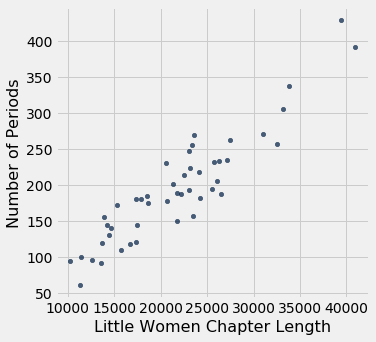

In [93]:
#Just run this cell
from urllib.request import urlopen 
import re
def read_url(url): 
    return re.sub('\\s+', ' ', urlopen(url).read().decode())

little_women_url = 'https://www.inferentialthinking.com/data/little_women.txt'
little_women_text = read_url(little_women_url)
little_women_chapters = little_women_text.split('CHAPTER ')[1:]

little_women = Table().with_columns([
        'Little Women Chapter Length', [len(s) for s in little_women_chapters],
        'Number of Periods', np.char.count(little_women_chapters, '.')
    ])

little_women.scatter(0,1)
little_women

**Question 4.1:** How many periods are in the chapter with the most characters?

In [94]:
periods_in_most_characters = little_women.sort("Little Women Chapter Length", descending = True).column(1).take(0)
periods_in_most_characters

392

In [95]:
_ = tests.grade('q4_1')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 4.2:** How many periods are in the chapter with the most characters per period?

In [96]:
cpp = little_women.column("Little Women Chapter Length")/little_women.column("Number of Periods")
new_lw = little_women.with_column("Character per Period", cpp)
new_lw.sort("Character per Period", descending = True).column("Number of Periods")[0]
periods_in_most_characters_per_period = new_lw.sort("Character per Period", descending = True).column("Number of Periods")[0]
periods_in_most_characters_per_period

61

In [97]:
_ = tests.grade('q4_2')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



In [98]:
# For your convenience, you can run this cell to run all the tests at once!
import os
print("Running all tests...")
_ = [tests.grade(q[:-3]) for q in os.listdir("tests") if q.startswith('q')]
print("Finished running all tests.")

Running all tests...
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running t